Анализ игр на различных платформах
========

<div>
    
<b> Описание проекта</b>
    
В данном преокте необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Объект анализа - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года включительно. Основными вопросами, на которые предстоят дать ответ, являются:
    
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
* Какие самые популярные платформы?
* Какие самые популярные жанры?
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
* Средние пользовательские рейтинги жанров Action и Sports разные?
* и др.
    
Данный проект состоит из пяти основных частей:
    
* Открытие файла и подготовка данных
* Исследовательский анализ данных
* Составление портрета пользователя каждого региона
* Проверка гипотез
* Общий вывод
    
</div>

Открытие файла и подготовка данных
========

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

Привел названия столбцов к нижнему регистру. Для простоты сделал это вручную, написав необходимые названия заново.

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div>
    
<b> Изменение типа данных</b>

<div> 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что для столбца 'year_of_release' стоит дробный тип данных. Заменю его на целочисленный тип.

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(0)

Поскольку в столбце 'year_of_release' есть пропущенные значения, нельзя поменять тип данных для этого столбца с float на integer. Поэтому предварительно заменил пропущенные значения на ноль. Далее, в процессе предобработки я решу, стоит ли дополнительно проводить действия над нулевыми значениями.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int32')

Теперь столбец 'year_of_release' отображается с правильным типом данных. Также необходимо поменять тип данных столбца 'user_score', чтобы вместо типа данных object стал float64.

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Для столбца 'user_score' нет возможности менять тип данных с object на float поскольку среди чисел есть 'tbd', которое не позволит поменять тип данных.

В столбцах с рейтингом есть стоки с значением tbd. 
To Be Determined - будет определено или требует уточнения. Видимо, данные неточны или возможно была накрутка, поэтому стоит такое значениею.

In [ ]:
df.loc[df['user_score'] == "tbd", 'user_score'] = 0

In [ ]:
df['user_score'] = df['user_score'].astype('float64')

Заменил тип данных для столбца 'user_score' на float

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
df['rating'] = df['rating'].fillna('undefined')

In [ ]:
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

<div class="alert alert-info">
    
Заменил значение NaN на undefined
</div>

<div>
    
<b> Обработка пропусков</b>

<div> 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int32
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             16715 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df.dropna(subset = ['name'], inplace = True)

Удалил строки, в которых нет названия игры. Эти данные не информативны. И их было мало

In [ ]:
df.reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int32
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             16713 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df['critic_score'].isnull().sum()

8576

In [ ]:
df['user_score'].isnull().sum()

6699

Заполнять пропущенные значения в столбцах 'critic_score' и 'user_score' нет смысла, поскольку это может исказить действительность. Я предполагаю, что эти зачения пропущены для игр, которые вышли в те времена, когда не существовало платформы с рейтингом, или для игр, которые прошли незаметно, которые мало кто покупал и, соответственно, некому было ставить оценку для рейтинга.

In [ ]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8576,0.51
user_score,6699,0.40
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00


<div>
    
<b> Определение суммарных продаж во всех регионах</b>

<div> 

In [ ]:
df['tot_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


Исследовательский анализ данных
========

<div>
    
<b> Сколько игр выпускалось в разные годы?</b>

<div> 

In [ ]:
df_years = (df.groupby([pd.Grouper(key='year_of_release')])
          .agg({'name':('count')}))
df_years

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


In [ ]:
df_years['period'] = 1

In [ ]:
df_years.reset_index(inplace=True)

In [ ]:
line = -1
for i in df_years['year_of_release']:
    line += 1
    if i == 0:
        df_years['period'][line] = 0
    if 0 < i < 1990:
        df_years['period'][line] = 'до 1990'
    if 1990 <= i < 2000:
        df_years['period'][line] = 'от 1990 до 2000'
    if 2000 <= i < 2010:
        df_years['period'][line] = 'от 2000 до 2010'
    if 2010 <= i < 2020:
        df_years['period'][line] = 'от 2010 до н.д.'

In [ ]:
del df_years['year_of_release']

In [ ]:
df_years = (df_years.groupby([pd.Grouper(key='period')])
          .agg({'name':('sum')}))
df_years

,name
period,
0,269
до 1990,205
от 1990 до 2000,1769
от 2000 до 2010,9193
от 2010 до н.д.,5277


In [ ]:
df_years.columns = ['count']
df_years.reset_index(inplace=True)
df_years

,period,count
0,0,269
1,до 1990,205
2,от 1990 до 2000,1769
3,от 2000 до 2010,9193
4,от 2010 до н.д.,5277


Как видно из таблицы, рассвет игр пришелся на период с 1990 до наших дней. При этом, до 2000 года было выпущено заметно меньше игр, чем начиная с 2000 года. Данные до 1990 года не так важны, поскольку их малое количество. Их и данные за период 0 можно отбросить. Но поскольку с 90х годов игровая индустрия сделала гигантский шаг вперед, то данные до 2000-го года нам тоже не так нужны.

In [ ]:
df = df.query('year_of_release >= 2000')

Убрал из исходной таблицы игры, год выпуска которых меньше 1990 года. Также убрал игры, для которых не был указан год выпуска.

<div>
    
<b> Как менялись продажи по платформам?</b>

<div> 

In [ ]:
df_platforms = (df.groupby(['platform', pd.Grouper(key='year_of_release')])
          .agg({'tot_sales':('sum')}))

In [ ]:
df_platforms.query('platform == "PS"')

tot_sales
platform year_of_release           
PS       2000                 96.37
         2001                 35.59
         2002                  6.67
         2003                  2.07

In [ ]:
df_platforms.query('platform == "PS2"')

tot_sales
platform year_of_release           
PS2      2000                 39.17
         2001                166.43
         2002                205.38
         2003                184.31
         2004                211.81
         2005                160.66
         2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40
         2010                  5.64
         2011                  0.45

In [ ]:
df_platforms.query('platform == "PS3"')

tot_sales
platform year_of_release           
PS3      2006                 20.96
         2007                 73.19
         2008                118.52
         2009                130.93
         2010                142.17
         2011                156.78
         2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60

In [ ]:
df_platforms.query('platform == "PS4"')

tot_sales
platform year_of_release           
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25

Для ответа на вопрос "Как менялись продажи по платформам?" возьмем за основу платформу PS. Как видно из среза для первой платформы этой фирмы, начиная со старта продаж (1994 год) до 1998 года каждый год продажи игр росли.В 1990 продажи упали и уже на следующий год вышла платформа PS2. Такой же принцип роста продаж игр и для следующих поколений приставки: после выхода приставка является актуальной 5 лет (в случае с PS3 - 6 лет). Затем один год продажи падают и компания выпускает новое поколение приставок. 

Для других популярных платформ актуальное время может отличаться.

In [ ]:
df_platforms.query('platform == "XB"')

tot_sales
platform year_of_release           
XB       2000                  0.99
         2001                 22.26
         2002                 48.01
         2003                 55.04
         2004                 65.42
         2005                 49.08
         2006                 10.04
         2007                  0.55
         2008                  0.18

In [ ]:
df_platforms.query('platform == "X360"')

tot_sales
platform year_of_release           
X360     2005                  8.25
         2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

In [ ]:
df_platforms.query('platform == "XOne"')

tot_sales
platform year_of_release           
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

Для платформы XBox назвать период актуальности сложнее, поскольку существует всего 2 поколения платформы, а так как данные предоставлены только до 2016, то XBox ONE трудно назвать период активности (за 2016 данные не полные). Но, судя по тому, что вцелом приставки похожи PS3 и XBox360,  PS3 и XBox ONE, можно предположить, что периоды активности схожи (для XBox360 видно, что период активности 6 лет).

In [ ]:
df['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

In [ ]:
df_platforms.query('platform == "PC"')

tot_sales
platform year_of_release           
PC       2000                  4.66
         2001                  5.47
         2002                  8.57
         2003                  8.84
         2004                 10.39
         2005                  4.37
         2006                  2.85
         2007                  9.28
         2008                 12.42
         2009                 16.91
         2010                 24.28
         2011                 35.03
         2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25

Для компьютера трудно назвать период активности. Во первых, потому что это одна платформа, которая не может стать следующего поколения (только комплектующие) и нельзя понять, когда он становится менее актуальным (хотя видны некоторые вспышки активности), по аналогии с игровыми приставками. Во вторых, среди игр на компьютере больше чем на других платформах процветает пиратство, поэтому и число покупок не такое большое, как у ps и xb.

In [ ]:
df_platforms.query('platform == "Wii"')

tot_sales
platform year_of_release           
Wii      2006                137.15
         2007                152.77
         2008                171.32
         2009                206.97
         2010                127.95
         2011                 59.65
         2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18

Для другой популярной платформы - Wii видим, что период активности давно прошел. Опять же, он был примерно 5 лет.

Всем надоело махать пультом перед телевизором.

In [ ]:
df_platforms.query('platform == "3DS"')

tot_sales
platform year_of_release           
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14

In [ ]:
df_platforms.query('platform == "DS"')

tot_sales
platform year_of_release           
DS       2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54

<div>
    
<b> Какую платформу выбрать для рекламной компании?</b>

<div> 

In [ ]:
df_platforms_total_new = df.query('year_of_release >= 2014')

In [ ]:
df_platforms_total = (df_platforms_total_new.groupby(['platform'])
          .agg({'tot_sales':('sum')}))

In [ ]:
df_platforms_total = df_platforms_total.sort_values(by = 'tot_sales', ascending = False)
df_platforms_total.reset_index(inplace=True)

In [ ]:
df_platforms_total

,platform,tot_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Из данной таблицы видим, что самые популярные платформы это платформы от sony и microsoft. Также популярны платформы 3DS и Wii, но их популярность идет на спад, причем очень сильно. 

Для получения максимальной выгоды стоит сфокусировать рекламную компанию на PS4 и XOne. Если необходимо выбрать, на какую из этих двух платформ можно сделать больший упор, я бы сказал, что на PS4, поскольку видно, что эта платформа пользуется гораздо большим спросом, нежели вторая.

In [ ]:
platform_names = df_platforms_total['platform']
platform_names

0     PS4
1    XOne
2     3DS
3     PS3
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object

In [ ]:
df_new_platforms = df.query('platform in @platform_names')
df_new_platforms['platform'].unique()

array(['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PSP', 'XOne', 'WiiU',
       'PSV'], dtype=object)

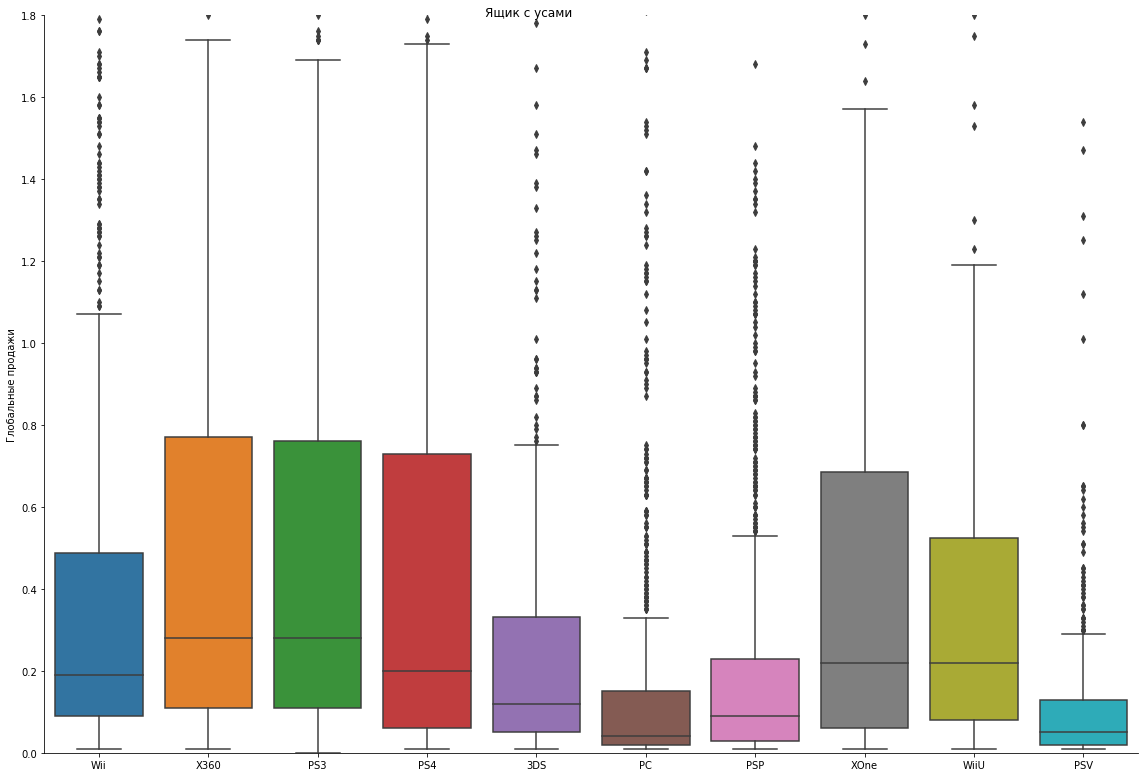

In [ ]:
g = sns.catplot(data = df_new_platforms, x = 'platform', y = 'tot_sales', kind="box")
plt.ylim(0, 1.8)
fig = plt.gcf()
fig.set_size_inches(18, 12)
g.set_axis_labels("", "Глобальные продажи")
g.fig.suptitle('Ящик с усами')
plt.show()

<div>
    
<b> Как влияют на продажи внутри одной платформы отзывы пользователей и критиков?</b>

<div> 

<div>
    
<b> Для платформы PS4</b>

<div> 

In [ ]:
df_PS4 = df.query('platform == "PS4"')

In [ ]:
df_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,undefined,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


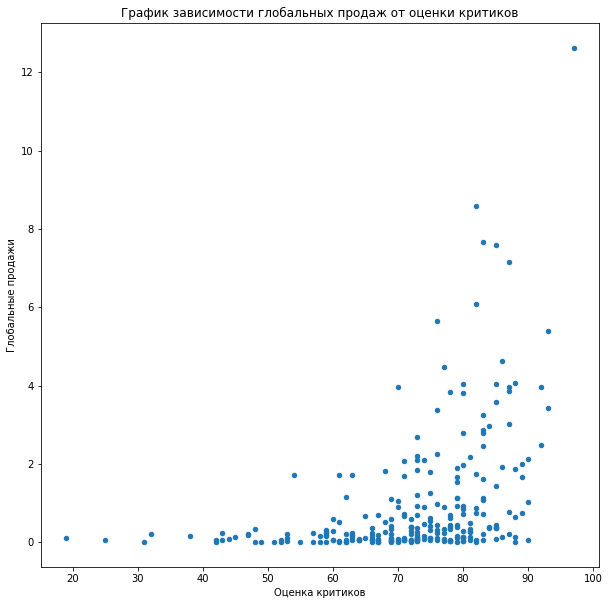

In [ ]:
g1 = df_PS4.plot(x='critic_score', y='tot_sales', kind='scatter', figsize = (10, 10) )
g1.set_title('График зависимости глобальных продаж от оценки критиков')
g1.set_xlabel('Оценка критиков')
g1.set_ylabel('Глобальные продажи')
plt.show()

In [ ]:
print('Корреляция для общих продаж и оценки критиков:', df_PS4['tot_sales'].corr(df_PS4['critic_score']))

Корреляция для общих продаж и оценки критиков: 0.406567902061781


Как на графике, так и в выводе функции корреляции видно, что зависимость продаж от оценки критиков не очень сильна.

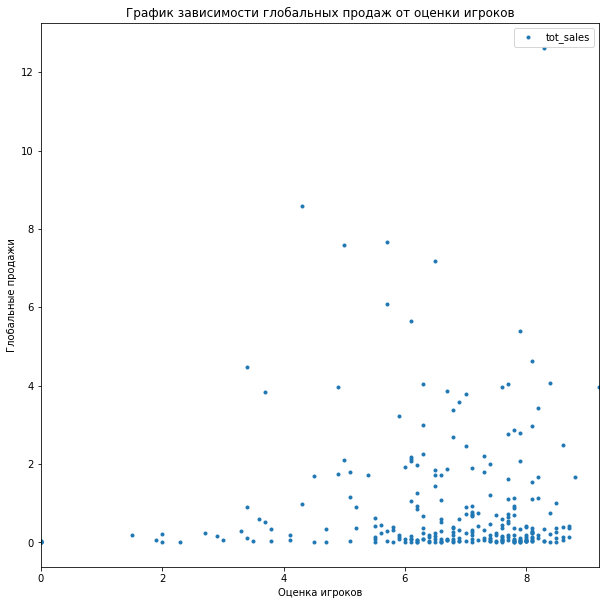

In [ ]:
g2 = df_PS4.plot(x='user_score', y='tot_sales', style=".", figsize = (10, 10))
g2.set_title('График зависимости глобальных продаж от оценки игроков')
g2.set_xlabel('Оценка игроков')
g2.set_ylabel('Глобальные продажи')
plt.show()

In [ ]:
print('Корреляция для общих продаж и оценки игроков:', df_PS4['tot_sales'].corr(df_PS4['user_score']))

Корреляция для общих продаж и оценки игроков: 0.02327930096361033


Как на графике, так и в выводе функции корреляции видно, что зависимость продаж от оценки игроков отсутствует.

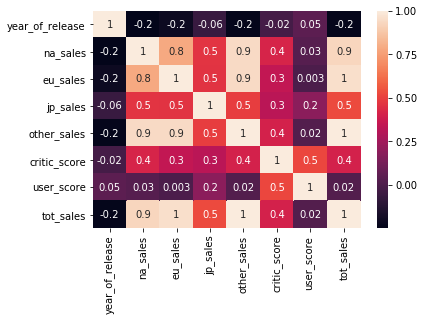

In [ ]:
map_1 = sns.heatmap(df_PS4.corr(), annot = True, fmt = '.1g')
map_1

Из тепловой карты видно, что нет зависимостей, которые могли бы быть довольно сильными и интересными нам.

<div>
    
<b> Для платформы XBOX ONE</b>

<div> 

In [ ]:
df_XOne = df.query('platform == "XOne"')

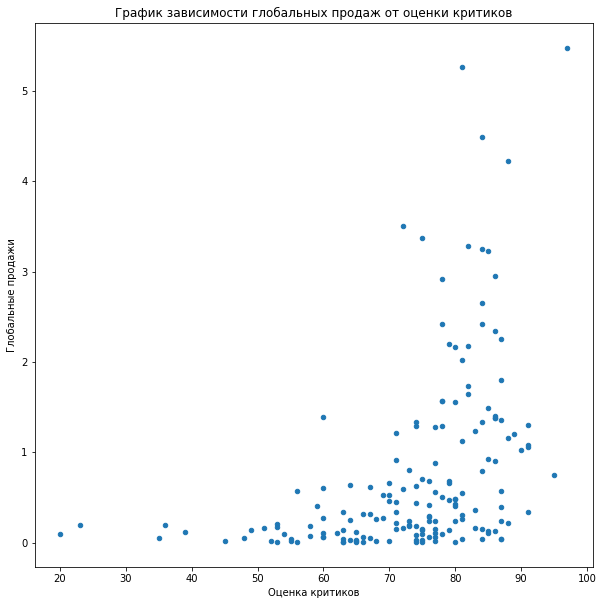

In [ ]:
g3 = df_XOne.plot(x='critic_score', y='tot_sales', kind='scatter', figsize = (10, 10)) 
g3.set_title('График зависимости глобальных продаж от оценки критиков')
g3.set_xlabel('Оценка критиков')
g3.set_ylabel('Глобальные продажи')
plt.show()

In [ ]:
print('Корреляция для общих продаж и оценки критиков:', df_XOne['tot_sales'].corr(df_XOne['critic_score']))

Корреляция для общих продаж и оценки критиков: 0.41699832800840175


Как на графике, так и в выводе функции корреляции видно, что зависимость продаж от оценки критиков не очень сильна.

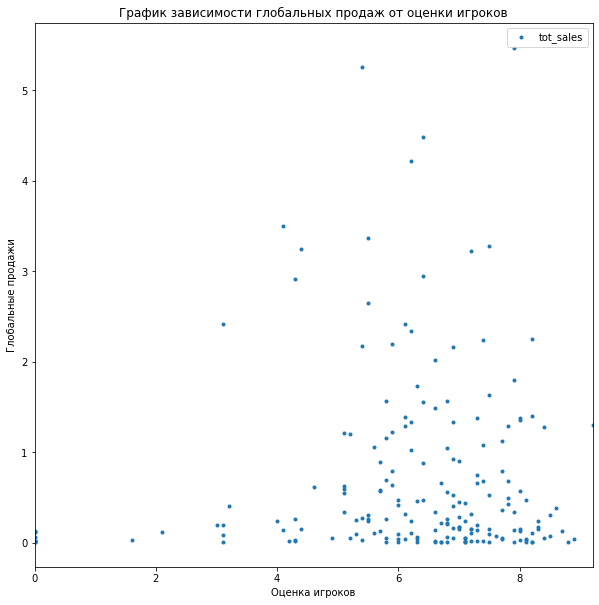

In [ ]:
g4 = df_XOne.plot(x='user_score', y='tot_sales', style=".", figsize = (10, 10)) 
g4.set_title('График зависимости глобальных продаж от оценки игроков')
g4.set_xlabel('Оценка игроков')
g4.set_ylabel('Глобальные продажи')
plt.show()

In [ ]:
print('Корреляция для общих продаж и оценки игроков:', df_XOne['tot_sales'].corr(df_XOne['user_score']))

Корреляция для общих продаж и оценки игроков: 0.07448560742246758


Как на графике, так и в выводе функции корреляции видно, что зависимость продаж от оценки игроков отсутствует.

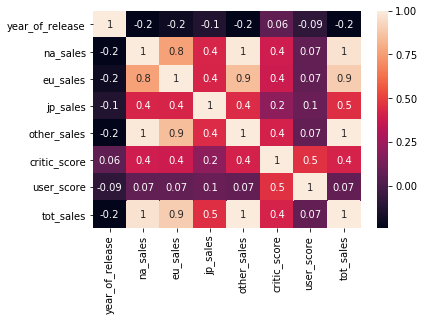

In [ ]:
map_2 = sns.heatmap(df_XOne.corr(), annot = True, fmt = '.1g')
map_2

Из тепловой карты видно, что нет зависимостей, которые могли бы быть довольно сильными и интересными нам.

Выводы для платформы XBOX ONE аналогичны PS4

<div>
    
<b> Вывод:</b>

<div> 

При прогнозе популярности игр не стоит ориентироваться на оценки критиков и игроков. У оценки критиков есть небольшая связь с популярностью игр, но это недостаточно, чтобы быть настоящим маркером прибыльной игры.

<div>
    
<b> Какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?</b>

<div> 

In [ ]:
df_genre = (df_platforms_total_new.groupby(['genre'])
          .agg({'tot_sales':('sum')})).sort_values(by = 'tot_sales', ascending = False)

In [ ]:
df_genre

,tot_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Самыми прибыльными жанрами являются экшн, шутер, спорт и ролевые игры. Далее жанры начинают сильно отставать от лидеров. Стоит отметить, что жанр экшн ледирует среди жанров с очень большим отрывом.

А вот вкладываться в рекламу игры жанра пазл не стоит. Топ самых не прибыльных жанров выглядит так: пазл, стратегия, приключение.

В выводе к данному разделу можно сказать, что пока что портрет выгодной игры выглядит так: игра жанра экшн на платформе PS4.

Составление портрета пользователя каждого региона
========

<div>
    
<b> Для региона NA</b>

<div> 

In [ ]:
df_NA = df.query('year_of_release >= 2014')

Взял выборку для игры, вышедших с 2014 года

In [ ]:
df_NA
del df_NA['eu_sales']
del df_NA['jp_sales']
del df_NA['other_sales']
del df_NA['tot_sales']

In [ ]:
df_NA_platforms = (df_NA.groupby(['platform'])
          .agg({'na_sales':('sum')})).sort_values(by = 'na_sales', ascending = False)

In [ ]:
df_NA_platforms

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


С 2014 года лидерами являются ps4 и xbox one.

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, теперь все верно!

In [ ]:
df_NA_genre = (df_NA.groupby(['genre'])
          .agg({'na_sales':('sum')})).sort_values(by = 'na_sales', ascending = False)

In [ ]:
df_NA_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


Тройка лидеров не меняется: экшн, шутер, спорт.

In [ ]:
df_NA_rating = (df_NA.groupby(['rating'])
          .agg({'na_sales':('sum')})).sort_values(by = 'na_sales', ascending = False)

In [ ]:
df_NA_rating

,na_sales
rating,
M,96.42
undefined,64.72
E,50.74
T,38.95
E10+,33.23


Для региона NA самыми популярными игры являются игры с рейтингом M и E.

UPD: Игры с неопределенным рейтингом занимают второе место по популярности.

Портрет пользователя в америке выглядит так: играет на платформе PS4 или XBOX ONE в экшн (или в шутеры, или в спортивные игры). Игры при этом рейтинга M или E (или рейтинг игры не определен).

<div>
    
<b> Для региона EU</b>

<div> 

In [ ]:
df_EU = df.query('year_of_release >= 2014')

In [ ]:
del df_EU['na_sales']
del df_EU['jp_sales']
del df_EU['other_sales']
del df_EU['tot_sales']

In [ ]:
df_EU_platforms = (df_EU.groupby(['platform'])
          .agg({'eu_sales':('sum')})).sort_values(by = 'eu_sales', ascending = False)

In [ ]:
df_EU_platforms

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


Для европы самыми прибыльными платформами являются PS4, PC и XBOX ONE. PS3 не берем в расчет, потому что эта консоль сильно теряет популярность.

In [ ]:
df_EU_genre = (df_EU.groupby(['genre'])
          .agg({'eu_sales':('sum')})).sort_values(by = 'eu_sales', ascending = False)

In [ ]:
df_EU_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


Тройка самых популярных жанров остается прежней: экшн, шутер и спорт.

In [ ]:
df_EU_rating = (df_EU.groupby(['rating'])
          .agg({'eu_sales':('sum')})).sort_values(by = 'eu_sales', ascending = False)

In [ ]:
df_EU_rating

,eu_sales
rating,
M,93.44
undefined,58.95
E,58.06
T,34.07
E10+,26.16


Самые популярные игры всё с тем же рейтингом, что и в америке

Портрет пользователя в европе выглядит так: играет на платформе PS4, РС или XBOX ONE в экшн (или в шутеры, или в спортивные игры). Игры при этом рейтинга M или E (или рейтинг игры не пределен).

<div>
    
<b> Для региона JP</b>

<div> 

In [ ]:
df_JP = df.query('year_of_release >= 2014')

In [ ]:
del df_JP['eu_sales']
del df_JP['na_sales']
del df_JP['other_sales']
del df_JP['tot_sales']

In [ ]:
df_JP_platforms = (df_JP.groupby(['platform'])
          .agg({'jp_sales':('sum')})).sort_values(by = 'jp_sales', ascending = False)

In [ ]:
df_JP_platforms

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


На японском рынке популярные платформы координально отличаются от европы и америки. В топе 3DS и другие портативные приставки. А на PC крайне мало продаж игр. Также популярна платформа PS4.

In [ ]:
df_JP_genre = (df_JP.groupby(['genre'])
          .agg({'jp_sales':('sum')})).sort_values(by = 'jp_sales', ascending = False)

In [ ]:
df_JP_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


Как и платформы, популярные жанры в японии тоже отличны от остального мира. Первое место занимают ролевые игры, а уже потом идет экшн. Остальные жанры заметно менее популярны.

In [ ]:
df_JP_rating = (df_JP.groupby(['rating'])
          .agg({'jp_sales':('sum')})).sort_values(by = 'jp_sales', ascending = False)

In [ ]:
df_JP_rating

,jp_sales
rating,
undefined,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Для региона JP самыми популярными игры являются игры с неопределенным рейтингом, затем идут с рейтингом Т и Е.

Портрет пользователя в японии выглядит так: играет на платформе 3DS или на других портативных играх в ролевые игры (или в шутеры). Игры при этом неопределенного рейтинга.

<div>
    
<b> Вывод</b>

<div> 

Для европы и америки портреты типичного геймера схожи, отличаются они только тем, что в америке игры на компьютере пользуются меньшим спросом. А вот в японии отличий намного больше. В ней любят играть в портативные приставки, в ролевые игры.

Проверка гипотез
=======

<div>
    
<b> Гипотеза 1</b>

<div> 

Поскольку нулевая гипотеза всегда со знаком равно, сформулировал нулевую и альтернативную гипотезу следующим образом:

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различные

In [ ]:
df_Xbox_One = df.query('platform == "XOne"')
df_PC = df.query('platform == "PC"')

In [ ]:
variance = np.var(df_Xbox_One['user_score'])
print('Дисперсия_для_Xbox_One', variance)
variance = np.var(df_PC['user_score'])
print('Дисперсия_для_PC', variance)

Дисперсия_для_Xbox_One 4.0742097774436905
Дисперсия_для_PC 5.019253013781961


Поскольку дисперсии различаются, то в метод .ttest_ind() а аргумент нужно вписать equal_var = False

In [ ]:
df_Xbox_One.dropna(subset = ['user_score'], inplace = True)

In [ ]:
df_PC.dropna(subset = ['user_score'], inplace = True)

Для проверки гипотез необходимо, чтобы в исследуемых данных не было NaN. Поэтому удалил их в рамках этого раздела.

In [ ]:
alpha = 0.05
results = st.ttest_ind(df_Xbox_One['user_score'], df_PC['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.006849697055461881
Отвергаем нулевую гипотезу


Вывод к гипотезе 1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

<div>
    
<b> Гипотеза 2</b>

<div> 

Поскольку нулевая гипотеза всегда со знаком равно, сформулировал нулевую и альтернативную гипотезу следующим образом:

Нулевая гипотеза - средние пользовательские рейтинги игр жанра Экшн и Спорт одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги игр жанра Экшн и Спорт различные

In [ ]:
df_Action = df.query('genre == "Action"')
df_Sports = df.query('genre == "Sports"')

In [ ]:
variance = np.var(df_Action['user_score'])
print('Дисперсия для жанра Action', variance)
variance = np.var(df_Sports['user_score'])
print('Дисперсия для жанра Sports', variance)

Дисперсия для жанра Action 8.721134848829664
Дисперсия для жанра Sports 11.472441047993238


Поскольку дисперсии различаются, то в метод .ttest_ind() а аргумент нужно вписать equal_var = False

In [ ]:
df_Action.dropna(subset = ['user_score'], inplace = True)

In [ ]:
df_Sports.dropna(subset = ['user_score'], inplace = True)

Для проверки гипотез необходимо, чтобы в исследуемых данных не было NaN. Поэтому удалил их в рамках этого раздела.

In [ ]:
alpha = 0.05
results = st.ttest_ind(df_Action['user_score'], df_Sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.713649529993891e-13
Отвергаем нулевую гипотезу


Вывод к гипотезе 2: Средние пользовательские рейтинги игр жанра Экшн и Спорт различны.

Общий вывод
=======

В рамках данного проекта выполнил агализ данных игр разных жанров для разных игровых приставок. Для этого на этапе предобработки данных заменил отсутствующие значения на ноль в столбце 'year_of_release' для того, чтобы можно было поменять тип данных. Также поменял тип данных для столбца user_score. Для этого пришлось заменить буквенное значение "tbd" на цифровое "0".

Заполнять пропущенные значения в столбцах 'critic_score' и 'user_score' не стал, поскольку это может исказить действительность. Я предполагаю, что эти зачения пропущены для игр, которые вышли в те времена, когда не существовало платформы с рейтингом, или для игр, которые прошли незаметно, которые мало кто покупал и, соответственно, некому было ставить оценку для рейтинга.

Далее посчитал общие продажи, сложив продажи в америке, европе, японии и других регионах. Затем создал сводную таблицу по прожадам игр на разных платформах по годам. Затем отсортировал года по категориям (десятилетиям). Стало видно, что данные до 2000 года нам не так нужны, поскольку их довольно мало (к тому же эти игры и платформы устарели).

Проверил, как менялись продажи игр по платформам. На основе срезов для каждый платформы я сделал вывод, что обычно пик активности платформы приходится на первые 5-6 лет. На последние два года из этого периода приходится всё меньше продаж и производитель выпукает новое поколение платформы. Также выяснил, что самыми популярными платформами являются PS4 и XBOX ONE. Как и предыдущие покаления этих приставок, они пользуются большой популярностью со старта прожаж. Из портативных игровых приставок выделяется 3DS, но ее популярность в мире идет на спад.

Затем выяснил, что отзывы критиков немного влияют на продажи игр. А вот отзывы пользователей и рейтинг игры (ESRB) не влияют на продажи.

Самыми популярными жанрами оказались экшн, шутер, спорт и ролевые игры.При этом жанр экшн лидирует с большим отрывом. Но ситуация меняется в зависимости от региона.

Проверил, как различаются портреты среднестатистического геймера в разных регионах. Портрет пользователя в америке выглядит так: играет на платформе PS4 или XBOX ONE в экшн (или в шутеры, или в спортивные игры). Игры при этом рейтинга M или E. Портрет пользователя в европе выглядит так: играет на платформе PS4, РС или XBOX ONE в экшн (или в шутеры, или в спортивные игры). Игры при этом рейтинга M или E. А портрет пользователя в японии выглядит так: играет на платформе 3DS или на других портативных играх в ролевые игры (или в шутеры). Игры при этом рейтинга Е или Т. Для европы и америки портреты типичного геймера схожи, отличаются они только тем, что в америке игры на компьютере пользуются меньгим спросом. А вот в японии отличий намного больше. В ней любят играть в портативные приставки, в ролевые игры.

Также я проверил 2 основных гипотезы.  Выяснил, что средние пользовательские рейтинги платформ Xbox One и PC различны (это была первая гипотеза). И средние пользовательские рейтинги игр жанра Экшн и Спорт различны (вторая гипотеза).

В итоге можно сказать, что если оринтироваться на европейский или американский рынок, то стоит вкладываться в рекламу для игр на платформе PS4 (или XBOX ONE, но выгоды может быть меньше). При этом жанр игр должен быть экшн (также можно шутер, спорт и ролевые игры, но опять же выгоды может быть меньше). Рейтинг игр предпочтителен M или E (или же неопределенный рейтинг).

Если же азиатский рынок предпочтительнее, то стоит обратить внимание на поративыне игровые приставки, особенно на 3DS. Для этого региона популярны ролевые игры с неопределенным рейтингом.